<h1>Tarea integradora - Parte 1</h1>

In [128]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
from scipy import stats # importando scipy.stats

In [129]:

seaborn.set_style('whitegrid')
seaborn.set_context('talk')

In [130]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [131]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


In [132]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [9]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

### Ejercicio 1
* Crear una imagen mostrando la distribución de los eventos por año

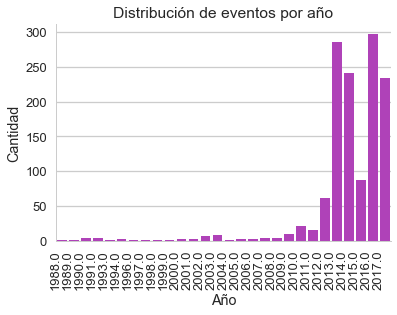

In [133]:
datos= dataset.year.dropna()
datos_1= datos.value_counts()
gr = seaborn.barplot(data=datos_1.to_frame().reset_index(),
        y='year', x='index', color='#c02ecc', orient="v")
gr.set_xticklabels(gr.get_xticklabels(), rotation=90, ha="right")
gr.set_xlabel('Año')
gr.set_ylabel('Cantidad')
gr.set_title('Distribución de eventos por año')
seaborn.despine()

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

In [134]:
lista_evento= datos_1.sort_index()
total_eventos= lista_evento.sum()
df_Year = pandas.DataFrame({
   'Year' : lista_evento.index.values,
   'Frecuencia' : lista_evento.get_values(),
}) 
df_Year['Frec_Prob'] = df_Year['Frecuencia']/total_eventos
df_Year = df_Year[['Year', 'Frecuencia', 'Frec_Prob']]
df_Year

,Year,Frecuencia,Frec_Prob
0,1988.0,1,0.000760
1,1989.0,1,0.000760
2,1990.0,5,0.003799
3,1991.0,5,0.003799
4,1993.0,2,0.001520
5,1994.0,3,0.002280
6,1996.0,1,0.000760
7,1997.0,1,0.000760
8,1998.0,2,0.001520
9,1999.0,2,0.001520


* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado

Text(0,0.5,'Prob')

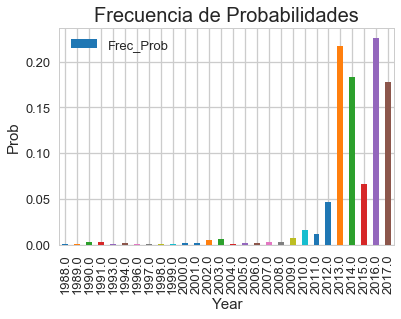

In [135]:
df_Year.plot.bar(x='Year', y='Frec_Prob')
plt.title("Frecuencia de Probabilidades", fontsize = 20) 
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Prob", fontsize = 15) 

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

Se debe a que la violencia va creciendo en los ultimos años, la tendencia de la muestra es exponencial

* Calcular la función de distribución acumulada de la variable Y y graficarla.

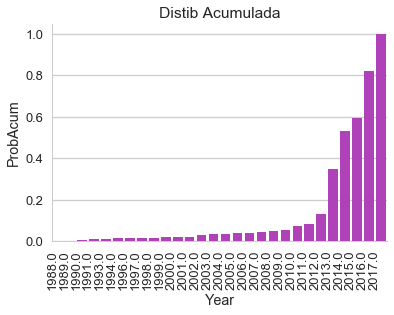

In [136]:
ProbAcum = []
for i in range(1,len(df_Year)+1):
    ProbAcum.append(df_Year.iloc[0:i]['Frec_Prob'].sum())
df_Year['ProbAcum'] = ProbAcum

gr_3=seaborn.barplot(data=df_Year.reset_index(),
        x='Year',y='ProbAcum', color='#c02ecc', orient="v")
gr_3.set_xticklabels(gr_3.get_xticklabels(), rotation=90, ha="right")
gr_3.set_xlabel('Year')
gr_3.set_ylabel('ProbAcum')
gr_3.set_title('Distib Acumulada')
seaborn.despine()


* ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

In [137]:
Prob= df_Year[df_Year['Year']==2015]
print("*Las probabilidas que se haya dado evento de violencia antes de este gobierno es {}".format(Prob['Frec_Prob'])) 


*Las probabilidas que se haya dado evento de violencia antes de este gobierno es 25    0.066109
Name: Frec_Prob, dtype: float64


### Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

In [138]:
provincia = dataset.provincia.dropna()
provincia= provincia.value_counts()
lista_evento_2= provincia.sort_index()
total_eventos_2= lista_evento_2.sum()
df_Prov = pandas.DataFrame({
   'Provincias' : lista_evento_2.index.values,
   'Frecuencia' : lista_evento_2.get_values(),
}) 
df_Prov['Frec_Prob'] = df_Prov['Frecuencia']/total_eventos_2
df_Prov = df_Prov[['Provincias', 'Frec_Prob']]
df_Prov

,Provincias,Frec_Prob
0,Buenos Aires,0.693182
1,Catamarca,0.001420
2,Chaco,0.020597
3,Chubut,0.026278
4,Ciudad de Buenos Aires,0.083097
5,Corrientes,0.003551
6,Córdoba,0.036932
7,Entre Rios,0.006392
8,Formosa,0.007102
9,Jujuy,0.006392


* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?

Ver según la cantidad de Habitantes por provincia cuantos hechos de violencia hay, ya que en este caso nos es relevante 
ver la cantindad por provincia, ya que por ejemplo buenos aires simpre va estar primero ya que tiene mas cantidad de habitantes que el resto de las provincias.

* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

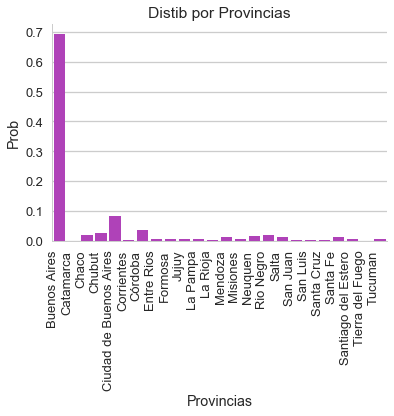

In [139]:
gr_4=seaborn.barplot(data=df_Prov.reset_index(),
        y='Frec_Prob', x='Provincias',color='#c02ecc', orient="v")
gr_4.set_xticklabels(gr_4.get_xticklabels(), rotation=90, ha="right")
gr_4.set_xlabel('Provincias')
gr_4.set_ylabel('Prob')
gr_4.set_title('Distib por Provincias')
seaborn.despine()

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores. ¿Son eventos independientes?

Que un hecho de violencia institucional suceda en una provincia y en un año en particular se ve como eventos independientes. Pero si se tiene en cuenta que puede haber problemas a nivel provicial en ese año ahí dejan de ser eventos independientes, como por ejemplo crisis economica. 

In [140]:
pandas.crosstab(index=dataset.year,
            columns=dataset.provincia, margins=True)

provincia,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad de Buenos Aires,Corrientes,Córdoba,Entre Rios,Formosa,Jujuy,...,Rio Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucuman,All
year,,,,,,,,,,,,,,,,,,,,,
1988.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1989.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1990.0,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1991.0,3,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1993.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2
1994.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
1996.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1997.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.

Text(0,0.5,'Cant por Año')

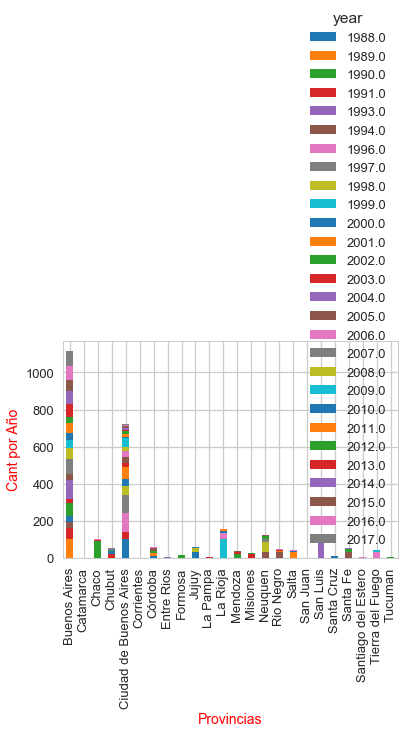

In [141]:
plot = pandas.crosstab(index=dataset.provincia,columns=dataset.year).apply(lambda r: r/r.sum() 
                *100,axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Provincias', fontsize=14, color='red')
plt.ylabel('Cant por Año', fontsize=14, color='red')

### Ejercicio 4

* Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

In [142]:
contexto1 = dataset.contexto1.dropna()
contexto1= contexto1.value_counts()
lista_evento_3= contexto1.sort_index()
total_eventos_3= contexto1.sum()
df_Contexto = pandas.DataFrame({
   'Contexto' : lista_evento_3.index.values,
   'Frecuencia' : lista_evento_3.get_values(),
}) 
df_Contexto['Frec_Hecho'] = df_Contexto['Frecuencia']/total_eventos_3
df_Contexto = df_Contexto[['Contexto', 'Frec_Hecho']]
df_Contexto
prob_1=df_Contexto[df_Contexto['Contexto'] =='Penal / Complejo Penitenciario PROVINCIAL']
prob_2=df_Contexto[df_Contexto['Contexto'] =='Penal / Complejo Penitenciario FEDERAL']
prob_3=df_Contexto[df_Contexto['Contexto'] =='Comisaría']
prob_4=df_Contexto[df_Contexto['Contexto'] =='Instalaciones de la Gendarmería Nacional']
prob_5=df_Contexto[df_Contexto['Contexto'] =='Centros de Detención Previos al Juicio (Alcaidia)']
prob_6=df_Contexto[df_Contexto['Contexto'] =='Móviles y medios de transporte de Fuerzas de S...']
prob_7=df_Contexto[df_Contexto['Contexto'] =='Instalaciones de las Fuerzas Armadas (cuartele...']
prob_8=df_Contexto[df_Contexto['Contexto'] =='Escuelas de Formación Fuerzas Nacionales']
prob_9=df_Contexto[df_Contexto['Contexto'] =='Escuelas de Formación Fuerzas Provinciales']
prob_10=df_Contexto[df_Contexto['Contexto'] =='Centros de Detención Preventiva']

ProbTotal=prob_1.Frec_Hecho.get_values()+prob_2.Frec_Hecho.get_values()+prob_3.Frec_Hecho.get_values()+prob_4.Frec_Hecho.get_values()
+prob_5.Frec_Hecho.get_values()+prob_6.Frec_Hecho.get_values()+prob_7.Frec_Hecho.get_values()+prob_8.Frec_Hecho.get_values()
+prob_9.Frec_Hecho.get_values()+prob_10.Frec_Hecho.get_values()

print('Prob. de que un evento ocurra dentro de una dep. de seguridad: ')
ProbTotal

Prob. de que un evento ocurra dentro de una dep. de seguridad: 


array([0.78122744])

### Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

In [169]:
#Calculo de la prob de que exista violencia fisica en el set de datos
violencia_Fisica_y_psiquica = dataset[ ~dataset['violencia_fisica'].isnull()& ~dataset['violencia_psiquica'].isnull() ]
Total_VF= dataset['violencia_fisica'].isnull()
Total_VF=Total_VF.value_counts()
Total_VF= Total_VF.sort_index()
Total_VF=Total_VF.sum()
Evento_VF= dataset.violencia_fisica.dropna()
Evento_VF=Evento_VF.value_counts()
Evento_VF= Evento_VF.sort_index()
Evento_VF=Evento_VF.sum()
prob_VF=Evento_VF/Total_VF
print("La probabilidad de exista Violencia fisica= {}".format(prob_VF))   

La probabilidad de exista Violencia fisica= 0.4100069492703266


In [170]:
#Calculo de la prob de que ya exste violencia fisica en el set de datos y que por eso exista violencia psíquica
Con_violencia_F = violencia_Fisica_y_psiquica [(violencia_Fisica_y_psiquica['violencia_fisica'] != 'Ninguno')]
Con_violencia_S= Con_violencia_F [(Con_violencia_F['violencia_psiquica'] != 'Ninguno')]
print("La probabilidad de violencia fisica y que también sea violencia psíquica   P(B/A)= P(A ∩ B) * P(A) {}".format(
   len(Con_violencia_S)/len(Con_violencia_F)*prob_VF
    )   
)

La probabilidad de violencia fisica y que también sea violencia psíquica   P(B/A)= P(A ∩ B) * P(A) 0.406726893676164


* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?

*Se aplico la formula de Probabilidad Condicional donde calculamos la probabilidad de que exista violencia fisica y que exista violencia psiquica dado que ocurrio violencia fisica 

* ¿Podemos concluir en que son eventos independientes dadas las muestras?

*Son eventos independientes ya que el hecho que suceda uno no afecta al otro.